In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Week-2

**Note to Learners**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. Ignore the vector $y$. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.9, noise=0.2, random_state=0)

## Problem 1
Plot the dataset using matplotlib.

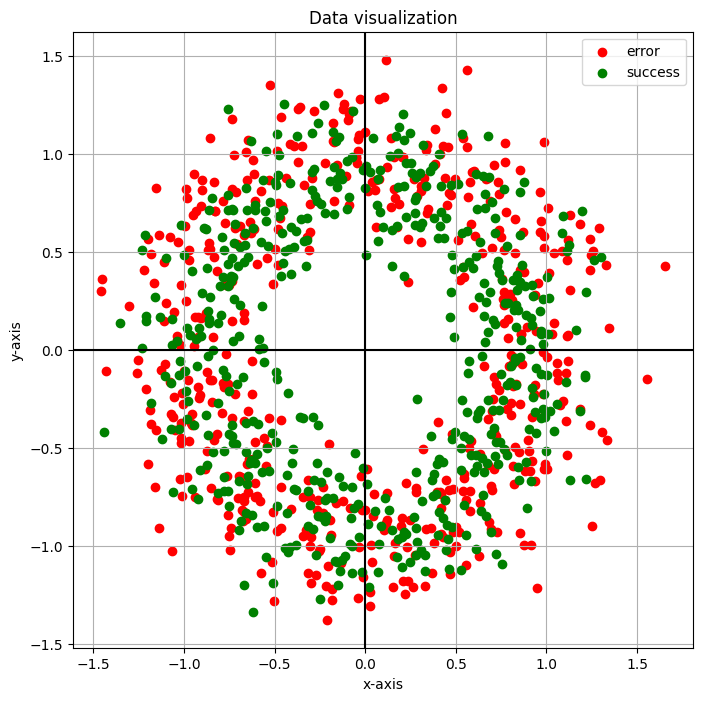

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X[y==0][:,0],X[y==0][:,1], color='red', label='error')
plt.scatter(X[y==1][:,0],X[y==1][:,1], color='green', label='success')
plt.grid(True)
plt.title('Data visualization')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.axhline(0,color='black')
plt.axvline(0,color='black')
plt.show()

## Problem 2
How many samples are there in the dataset?


In [ ]:
print(X.shape[0])

1000


## Problem 3
How many features are there in the dataset?

In [ ]:
print(X.shape[1])

2


## Problem 4
Find the kernel matrix $K$ using the polynomial kernel with degree $2$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [ ]:
# from sklearn.metrics.pairwise import polynomial_kernel
# K = polynomial_kernel(X, X, degree=2)
K = (X @ X.T + 1) ** 2
# print(K**2)
print(math.sqrt(np.mean(K**2)))

2.096249971441002


## Problem 5
Find the kernel matrix $K$ using the Gaussian kernel with parameter $\sigma = 2$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [ ]:
# from sklearn.metrics.pairwise import rbf_kernel
def rbf_kernel(X, X1, sigma):
  pairwise_dists = np.sum(X**2, axis=1).reshape(-1,1) + np.sum(X1**2, axis=1) - 2 * np.dot(X, X1.T)
  # print(pairwise_dists.shape)
  return np.exp(-pairwise_dists/(2*sigma**2))
sigma = 2
K = rbf_kernel(X, X,sigma)
print(math.sqrt(np.mean(K**2)))

0.8079400085320028


## Problem 6
Find the center of the kernel matrix $K$ obtained in problem 2. Call this centered matrix $KC$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} KC_{ij}^2}
$$

In [ ]:
from sklearn.metrics.pairwise import polynomial_kernel
K = (X @ X.T + 1) ** 2
n = K.shape[0]
I=np.ones((n,n)) * 1/n
KC=K-K@I-I@K+I@K@I
print(math.sqrt(np.mean(KC**2)))

1.4517985176976846


## Problem 7
Find the projections (scalar) of all the data points on to the first two principal components obtained using polynomial kernel of degree 2.

<u>Conversion</u>

if $\alpha_1, \alpha_2, ..., \alpha_n$ are the prjections on the first PC and $\beta_1, \beta_2, ..., \beta_n$ are the projections on the second PC, enter the following quantity as your answer correct to two decimal places:

$$\sum_{i = 1}^{n} \alpha_i + \sum_{i = 1}^{n} \beta_i$$

In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(KC)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
w1 = sorted_eigenvectors[:, 0]/np.sqrt(sorted_eigenvalues[0])
w2 = sorted_eigenvectors[:, 1]/np.sqrt(sorted_eigenvalues[1])
a = np.mean(np.abs(w1 @ X))
b = np.mean(np.abs(w2 @ X))
# print(a)
# print(b)
print(a + b)



0.9842886706792712
